# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Abubakar Ibrahim**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# Import train/test splitting function from sklearn to split the data into training and testing data
from sklearn.model_selection import train_test_split
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge
#Importing the linear model from Sklearn
from sklearn.linear_model import LinearRegression
# Import metrics module
from sklearn import metrics
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv', index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


Observed Unnamed Column from the Dataset that needs to be DROPPED because ........

In [4]:
#remove the Unnamed Column
df_train = df_train.drop('Unnamed: 0', axis=1)

In [5]:
# View Column Names for possible White Spaces
df_train.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

No Column Name with White Spaces

NEXT we proceed to EDA (Exploratory Data Analysis) to gain further Insight about the Variables in our Dataset

In [6]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [7]:
#check the shape of the dateset
print('The shape of the dataset : ', df_train.shape)

The shape of the dataset :  (8763, 48)


Our Shape looks good;

- For the TRAIN dataset; we have 8763 rows and 48 columns
- And for our TEST dataset; we have 2920 rows and 47 columns excluding our dependent variable "load_shortfall_3h"
NEXT we move further to verify the DataTypes and Check for possible missing values PER Column

In [8]:
# summary of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

Our Outcome Includes; 

1. Identified 3(three) of our Potential features having datatype OBJECT (Categorical)

       a. Valencia_wind_deg --> Covert to Numerical 
       b. Seville_pressure  --> Covert to Numerical 
       c. time              --> Covert to DateTime
       
2. Valencia_pressure  has   6695 non-null   Instead of 8763 (TOTAL MISSING VALUE = 2068)

In [9]:
# look at data statistics
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


Here we take a look at the summary statistics of the caterogorical variables

In [10]:
# look at data statistics of categorical data
df_train.describe(include=['object'])

,time,Valencia_wind_deg,Seville_pressure
count,8763,8763,8763
unique,8763,10,25
top,2015-01-01 03:00:00,level_1,sp13
freq,1,1072,500


Valencia_wind_deg are Categorized between 
   * Level_1 to Level_10   
   
Seville_pressure are Categorized between
   * sp1  to  sp25

In [11]:
#check the dataset for null values
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

<AxesSubplot:>

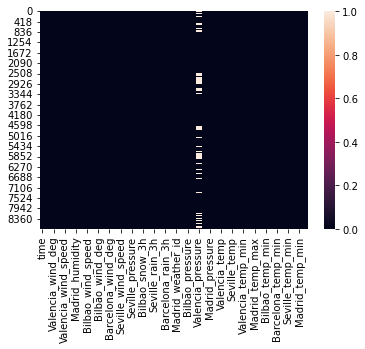

In [12]:
#Plot heatmap of missing values
sns.heatmap(df_train.isnull())

The above heatmap shows how the missing value is spread with in the column (Valencia_pressure)

In [13]:
#Count duplicates
df_train.pivot_table(columns=['Seville_pressure'], aggfunc='size')

Seville_pressure
sp1     270
sp10    460
sp11    139
sp12    378
sp13    500
sp14    255
sp15    326
sp16    392
sp17    401
sp18    395
sp19    357
sp2     325
sp20    340
sp21    408
sp22    392
sp23    339
sp24    405
sp25    410
sp3     309
sp4     404
sp5     372
sp6     411
sp7     174
sp8     418
sp9     183
dtype: int64

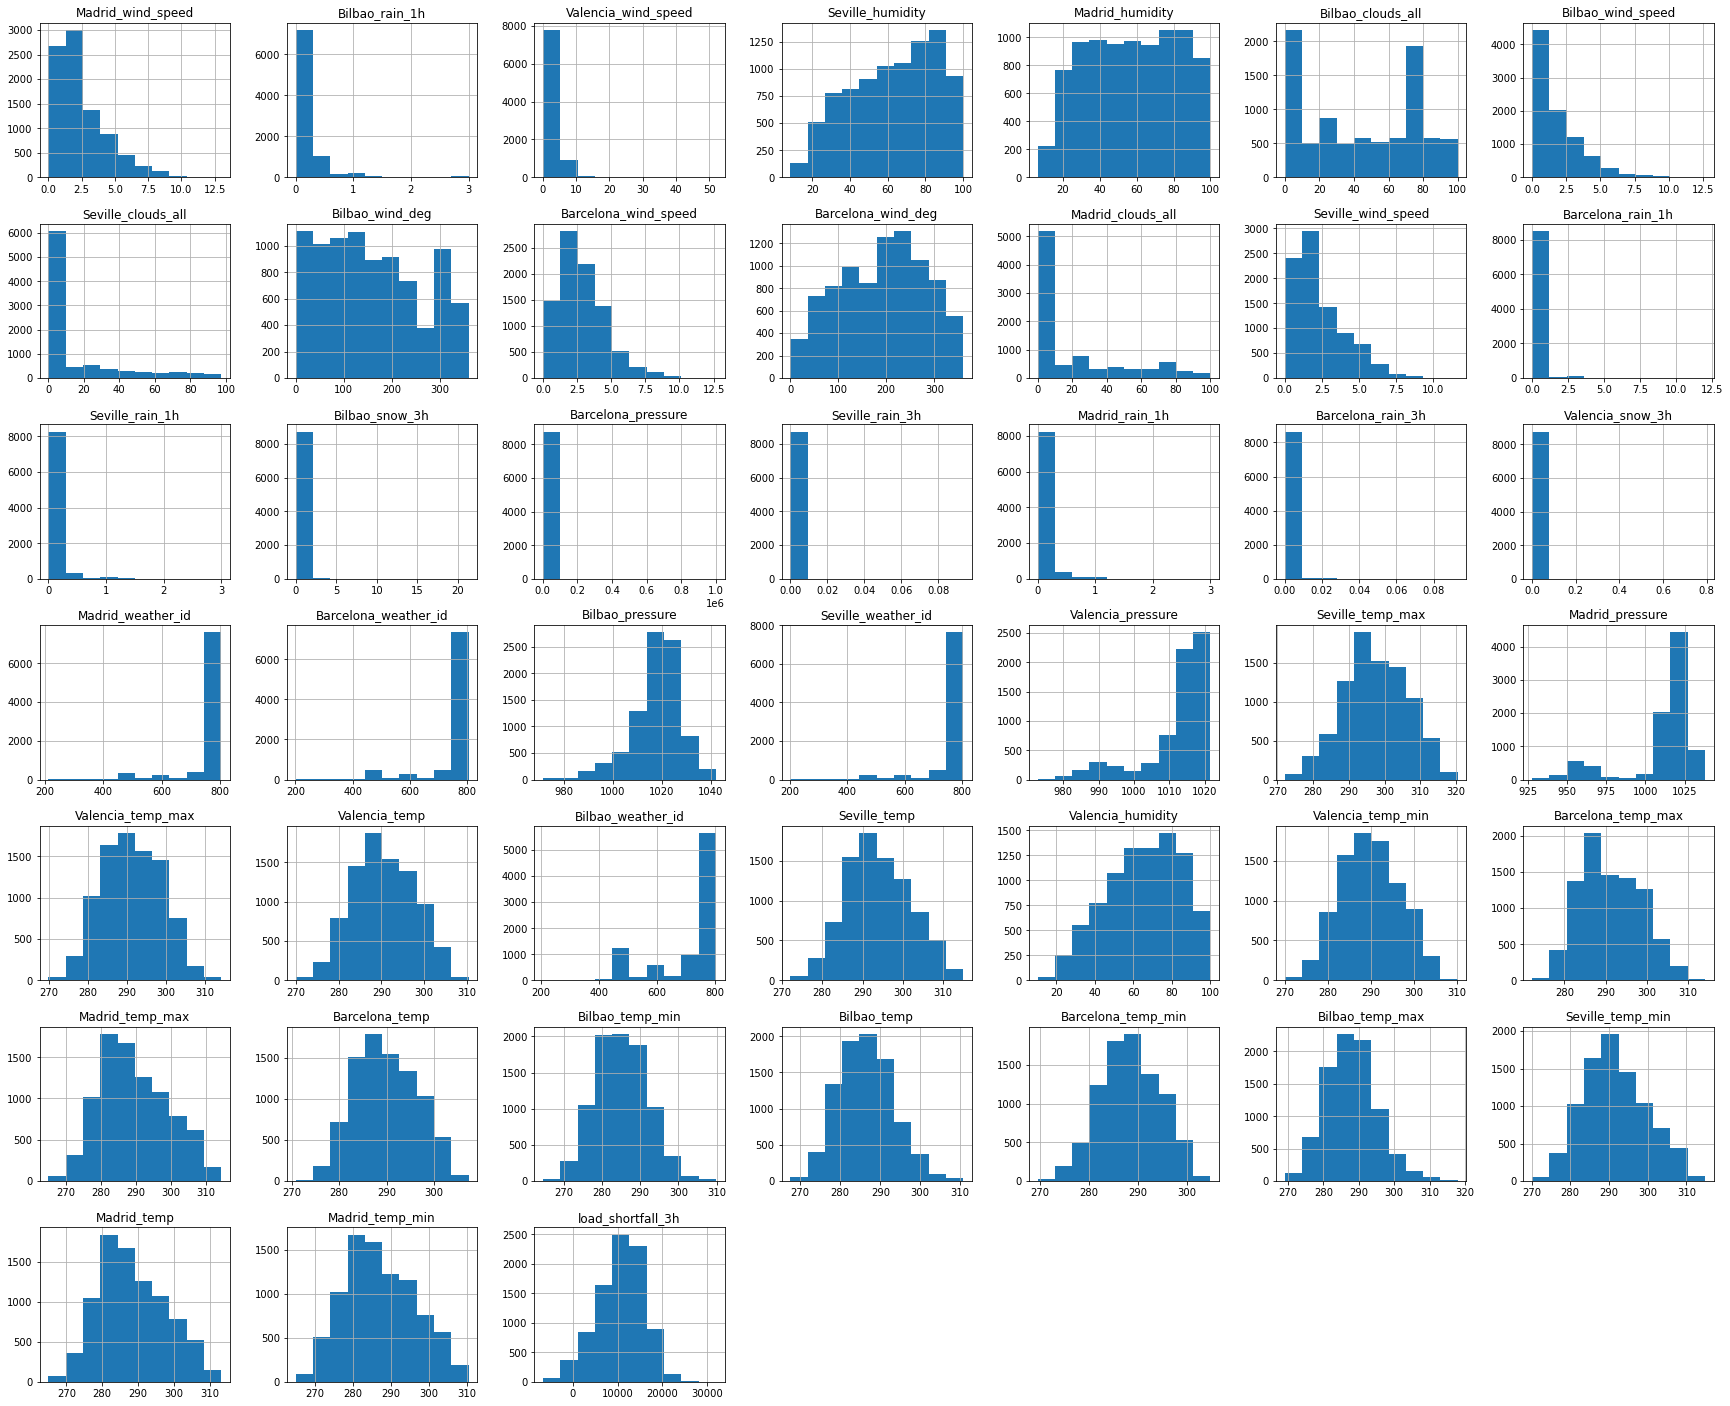

In [14]:
# plot relevant feature interactions
pd.DataFrame.hist(df_train, figsize=[30,25])
plt.show()

In [15]:
# evaluating the correlation btw the features and the target variable
#correlation['load_shortfall_3h'].sort_values(ascending=False)
df_train['time'] = pd.to_datetime(df_train['time'])

In [16]:
df_train['Day_of_Week'] = df_train['time'].dt.dayofweek
df_train['Week_of_Year'] = df_train['time'].dt.weekofyear
df_train['Day_of_Year'] = df_train['time'].dt.dayofyear
df_train['Month_of_Year'] = pd.DatetimeIndex(df_train['time']).month #Actual Month
df_train['Year'] = pd.DatetimeIndex(df_train['time']).year #Actual Year
df_train['Day_of_Month'] = pd.DatetimeIndex(df_train['time']).day #Day of month
df_train['Hour_of_Day'] = pd.DatetimeIndex(df_train['time']).hour #Hour of day
df_train['Hour_of_Year'] = (df_train['time'].dt.dayofyear )* 24 + df_train['time'].dt.hour #Hour of year -1
df_train['Hour_of_Week'] = (df_train['time'].dt.dayofweek ) * 24 +  df_train['time'].dt.hour #Hour of week
#df_train = df_train.drop('time', axis=1)
df_train.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_12964/1564974073.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['Week_of_Year'] = df_train['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,load_shortfall_3h,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,6715.666667,3,1,1,1,2015,1,3,27,75
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,4171.666667,3,1,1,1,2015,1,6,30,78
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,4274.666667,3,1,1,1,2015,1,9,33,81
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,5075.666667,3,1,1,1,2015,1,12,36,84
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,6620.666667,3,1,1,1,2015,1,15,39,87


In [17]:
# evaluate correlation
correlation = df_train.corr()
# evaluating the correlation btw the features and the target variable
correlation['load_shortfall_3h'].sort_values(ascending=False)

load_shortfall_3h       1.000000
Hour_of_Year            0.205906
Day_of_Year             0.205528
Valencia_temp_min       0.201863
Week_of_Year            0.201080
Month_of_Year           0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Hour_of_Day             0.139285
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day_of_Month            0.092116
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_wea

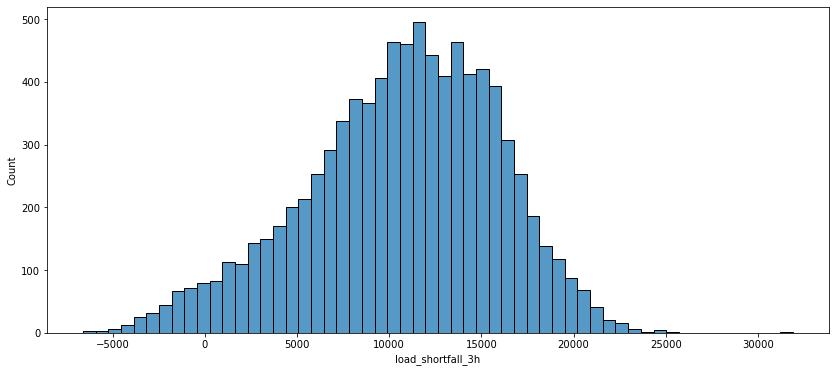

In [18]:
# have a look at feature distributions
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df_train['load_shortfall_3h'])
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [19]:
#selecting and creating the dummy variables for the categorical features
categorical_var = df_train[['Valencia_wind_deg', 'Seville_pressure']]
categorical_var_dum = pd.get_dummies(categorical_var, drop_first=True)
categorical_var_dum.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
time = df_train[['time']]

In [21]:
#count the number of null values in each column
df_train['Valencia_pressure'].isnull().sum()

2068

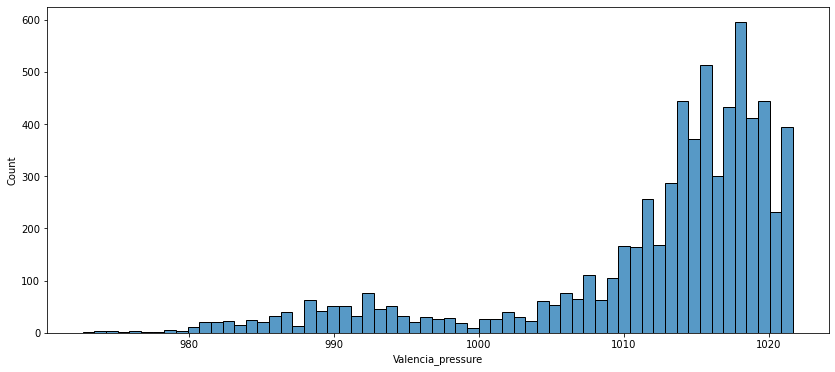

In [22]:
#histogram of the feature with the missing value (Valencia_pressure)
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df_train['Valencia_pressure'], ax=ax);

In [23]:
#copy the training data to a new dataframe
#del df
df = df_train.copy()

In [24]:
#drop the column with Object data type
df = df.drop(['time', 'Valencia_wind_deg', 'Seville_pressure'], axis=1)

In [25]:
target = df['load_shortfall_3h']

In [26]:
df = df.drop('load_shortfall_3h', axis=1)
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,265.938000,3,1,1,1,2015,1,3,27,75
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,266.386667,3,1,1,1,2015,1,6,30,78
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,272.708667,3,1,1,1,2015,1,9,33,81
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,281.895219,3,1,1,1,2015,1,12,36,84
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,280.678437,3,1,1,1,2015,1,15,39,87


Here the StandarScaler is used to scale the dataframe

In [27]:
# create scaler object
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [28]:
# convert the scaled predictor values into a dataframe
standardise = pd.DataFrame(scaled ,columns=df.columns)
standardise.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


Here we use the K-nearest neighbours (KNN) Algorithm to Impute the missing valuse, KNN calculates the mean of the neighbours based on the number of neighbours specified in side pramenter here we are using (5) as the number of neighbours

In [29]:
# engineer existing features
# handling missing values/ features
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(standardise),columns = standardise.columns)

In [30]:
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


In [31]:
#cancatenating the df with the dummy categorical df
df = pd.concat([df, categorical_var_dum], axis=1)
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


In [32]:
#Rearranging the columns
column_titles = [col for col in df.columns]
df = df.reindex(columns = column_titles)

In [33]:
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


### Cleaning the test dataframe and handling the missing values

In [34]:
#copy the test df to a new df
test_df = df_test.copy()

In [35]:
test_df['time'] = pd.to_datetime(test_df['time'])

In [36]:
test_df['Day_of_Week'] = test_df['time'].dt.dayofweek
test_df['Week_of_Year'] = test_df['time'].dt.weekofyear
test_df['Day_of_Year'] = test_df['time'].dt.dayofyear
test_df['Month_of_Year'] = pd.DatetimeIndex(test_df['time']).month #Actual Month
test_df['Year'] = pd.DatetimeIndex(test_df['time']).year #Actual Year
test_df['Day_of_Month'] = pd.DatetimeIndex(test_df['time']).day #Day of month
test_df['Hour_of_Day'] = pd.DatetimeIndex(test_df['time']).hour #Hour of day
test_df['Hour_of_Year'] = (test_df['time'].dt.dayofyear )* 24 + test_df['time'].dt.hour #Hour of year -1
test_df['Hour_of_Week'] = (test_df['time'].dt.dayofweek ) * 24 +  test_df['time'].dt.hour #Hour of week
#df_train = df_train.drop('time', axis=1)
test_df.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_12964/858496451.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Week_of_Year'] = test_df['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,279.150000,0,1,1,1,2018,1,0,24,0
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,278.150000,0,1,1,1,2018,1,3,27,3
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,276.150000,0,1,1,1,2018,1,6,30,6
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,274.483333,0,1,1,1,2018,1,9,33,9
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,280.150000,0,1,1,1,2018,1,12,36,12


In [37]:
test_time = test_df[['time']]

In [38]:
test_time

,time
8763,2018-01-01 00:00:00
8764,2018-01-01 03:00:00
8765,2018-01-01 06:00:00
8766,2018-01-01 09:00:00
8767,2018-01-01 12:00:00
...,...
11678,2018-12-31 09:00:00
11679,2018-12-31 12:00:00
11680,2018-12-31 15:00:00
11681,2018-12-31 18:00:00


In [39]:
test_time = test_time.reset_index().drop(["index"], axis=1)

In [40]:
test_time

,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


In [41]:
#drop the categorical columns 
test_df = test_df.drop(['time', 'Valencia_wind_deg', 'Seville_pressure' ], axis=1)

In [42]:
#sacling the dataFrame using the StandarScalar
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

In [43]:
#Imputing the missing values using Knn Imputer
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns = test_df.columns)

In [65]:
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,0,0,1,0,0,0,0,0,0,0
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,0,0,1,0,0,0,0,0,0,0
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,0,0,1,0,0,0,0,0,0,0
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,0,0,1,0,0,0,0,0,0,0
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,0,0,1,0,0,0,0,0,0,0


In [45]:
#creating dummies for test categorical variables
cat_var = df_test[['Valencia_wind_deg', 'Seville_pressure']]
test_dummies = pd.get_dummies(cat_var, drop_first=True)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
8763,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8764,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8765,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8766,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8767,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Resetting the index to start from zero not (8763), which will make an additional column called index, so the index column is being drop here: this is done to make the work of concatenation easrie with out having issues with NaN

In [46]:
#resetting the index and droping the index column
test_dummies = test_dummies.reset_index().drop(["index"], axis=1)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
#concatenating the test dataframe and the test_dummies dataframe
test_df = pd.concat([test_df, test_dummies], axis=1)
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,0,0,1,0,0,0,0,0,0,0
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,0,0,1,0,0,0,0,0,0,0
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,0,0,1,0,0,0,0,0,0,0
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,0,0,1,0,0,0,0,0,0,0
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,0,0,1,0,0,0,0,0,0,0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [48]:
import xgboost as xgb

In [49]:
data_dmatrix = xgb.DMatrix(data=df,label=target)

In [50]:
#creating the features and target variables
X = df
y = target

In [63]:
X.shape

(8763, 86)

In [51]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)


In [52]:
# create one or more ML models

# Create linear model
lm = LinearRegression()
# Create ridge model
ridge = Ridge()
#create Xgboost
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.5,
                max_depth = 4, alpha = 10, n_estimators = 10)

In [53]:
# Fit the Ml model
lm.fit(x_train, y_train)
ridge.fit(x_train, y_train)
xg_reg.fit(x_train, y_train)

[01:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [54]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [55]:
b0

10028.57903265881

In [56]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, x_train.columns, columns=['Coefficient'])

In [57]:
coeff

,Coefficient
Madrid_wind_speed,-389.613791
Bilbao_rain_1h,-189.445916
Valencia_wind_speed,-109.710743
Seville_humidity,-769.153077
Madrid_humidity,-232.503044
...,...
Seville_pressure_sp5,-316.972193
Seville_pressure_sp6,-329.763750
Seville_pressure_sp7,-1200.119257
Seville_pressure_sp8,-449.967938


In [58]:
# evaluate one or more ML models
train_ridge = ridge.predict(x_train)
train_lm = lm.predict(x_train)
xgboost = xg_reg.predict(x_train)

print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))
print('linear Model :', metrics.mean_squared_error(y_train, train_lm))
print('Xgboost Model :', metrics.mean_squared_error(y_train, xgboost))

Ridge : 21903095.36697412
linear Model : 22108586.895064067
Xgboost Model : 10092201.91008081


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [59]:
# Compare model performance
test_ridge = ridge.predict(x_test)
test_lm = lm.predict(x_test)
test_xgboost = xg_reg.predict(x_test)

print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))
print('linear Model :', metrics.mean_squared_error(y_test, test_lm))
print("Xgboost: ", metrics.mean_squared_error(y_test, test_xgboost))


Ridge : 22871698.891933773
linear Model : 24337893.18992444
Xgboost:  14491471.539943354


In [62]:
print('Xgboost Model: ', np.sqrt(metrics.mean_squared_error(y_train, xgboost)))

Xgboost Model:  3176.822612309477


In [61]:
test_df = test_df.drop('load_shortfall_3h', axis=1)

In [ ]:
new_prediction = xg_reg.predict(test_df)

In [ ]:
# Choose best model and motivate why it is the best choice
predictions = ridge.predict(test_df)
predictions

In [ ]:
#test_df= test_df.drop('time', axis=1)

In [ ]:
#test_df = test_df.drop('load_shortfall_3h', axis=1)
new_prediction

In [ ]:
test_df['load_shortfall_3h'] = new_prediction

In [ ]:
data = test_time
data

In [ ]:
new_prediction

In [ ]:
data = pd.concat([data, test_df[['load_shortfall_3h']]], axis=1)

In [ ]:
#del data

In [ ]:
data.to_csv('predictions_sub_9.csv', header=True, index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic